In [4]:
from sympy import *
import math
import numpy as np
from pylab import *
import matplotlib.pyplot as plt 

$Input$:

$y' = x+y$

$y(0) = 1\quad0\le x \le 1$

$h = 0.2$

$S =3$

$eps=10^{-5}$

In [5]:
def F(x,y):
    return x + y
def G(x):
   return 2*math.exp(x)-x-1
x0 = 0
y0 = 1
X = 0.8
h = 0.2
S = 4
eps = 1e-5

In [2]:
def Giaithua(n):
  res = 1
  if n>1:
    for i in range (1,n+1):
      res *= i
  return res

$y_{i} 
=y_{i-1} +h( a_0y_{i}^{'} + a_1 \bigtriangledown y_{i}^{'} + a_2 \bigtriangledown ^{2}  y_{i}^{'} + ... + a_{s-1} \bigtriangledown ^{s-1} y_{i}^{'}$ \\
$a_i = \frac{1}{i!}\int\limits_{-1}^{0}t(t+1)...(t+i-1) dt$ \\
Input: Giá trị S \\
Output: Mảng S phần tử a[i] cần tính

In [6]:
def Tinhtp(S):
  a = np.zeros(S,dtype= float)
  b = np.zeros(S,dtype= float)
  a[0] = -1
  a[1] = 1
  kq = 0
  for x in range(0,S):
   if(x > 1):
    for j in range(x,0,-1):
       a[j] = a[j-1] + a[j]*(x-2)
    a[0] = 0
   for i in range(x+1):
    kq = kq + a[i]/(i+1)
   kq = kq/Giaithua(x)
   if(x==0):
     b[x] = 1 
   else:
     b[x] = kq
   kq = 0
  return b
print(Tinhtp(S))

[ 1.         -0.5        -0.08333333 -0.04166667]


Áp dụng công thức sai phân: $\bigtriangledown y_{i}^{'} = y_{i}^{'} - y_{i-1}^{'} , \bigtriangledown^2y_{i} = \bigtriangledown y_{i}^{'} - \bigtriangledown y_{i-1}^{'}, ...$ \\
Khi đó ta có: \\
$y_{i} = y_{i-1} + h(b_0*y_{i}^{'} + b_1*y_{i-1}^{'} +...+ b_{s-1}*y_{i-s+1}^{'})$ \\
Với:
$\begin{bmatrix}
b_0 & b_1&    b_2&...&b_{s-1} 
\end{bmatrix}
= \begin{bmatrix} a_0 & a_1&a_2&...&a_{s-1}\end{bmatrix}*\begin{bmatrix} 1&0&0&...&0 \\1& -1&0&...&0\\1&-2&1&...&0\\.&.&.&.&.
\end{bmatrix}$



In [9]:
def pascal(n):
  pas = np.zeros((n,n), dtype= float)
  for i in range(n):
    pas[i][0] = 1
    for j in range(1,i+1):
      pas[i][j]=pas[i-1][j-1]*(-1)+pas[i-1][j]
  return pas

# in ra mảng pas
print(pascal(S))

[[ 1.  0.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 1. -3.  3. -1.]]


###### Áp dụng công thức sai phân: $\nabla y_{i}^{'} = y_{i}^{'} - y_{i-1}^{'} , \nabla^2y_{i} = \nabla y_{i}^{'} - \nabla y_{i-1}^{'}, ...$

###### Khi đó ta có: $y_i = y_{i-1} + h(b_0y_{i}^{'} + b_1y_{i-1}^{'} +...+ b_{s-1}y_{i-s+1}^{'}) $ 

###### Đặt $delta = h(b_1y_{i-1}^{'} +...+ b_{s-1}y_{i-s+1}^{'})$ 

###### Khi đó, ta có:  $y_i = y_{i-1} + hb_0y_{i}^{'}  + delta = y_{i-1} + hb_0F(x_i,y_i) + delta$ 

Ta sẽ có quá trình lặp:  
$$ \begin{pmatrix} 
y_{i}^{0} = y_{i-1} + hb_0F(x_i,y_{i-1}) + delta \\ y_{i}^{1} = y_{i-1} + hb_0F(x_i,y_{i}^{0}) + delta \\.................................\\ y_{i}^{q} = y_{i-1} + hb_0F(x_i,y_{i}^{q-1}) + delta 
\end{pmatrix} $$ 
Quá trình sẽ dừng lặp khi $ |y_{i}^{q} - y_{i}^{q-1}| < eps $

In [23]:
def PTVPAM(x0,y0,X,S,h,eps):
  n = int((X-x0)/h)
  x = np.zeros(n+1, dtype= float)
  y = np.zeros(n+1, dtype=float)
  a = np.zeros(S, dtype= float)
  b = np.zeros(S, dtype= float)
  pas = np.zeros((S,S), dtype= float)
  ss = np.zeros(n+1, dtype= float)
  g = np.zeros(n+1, dtype= float)
  q = np.zeros(n+1, dtype= float)
  
  y[0] = y0
  for i in range(n+1):
    x[i] = x0 + i*h


  a = Tinhtp(S)
  pas = pascal(S)
  for i in range(S):
    b[i] = 0
    for j in range(S):
      b[i]=b[i]+a[j]*pas[j][i]
  print("Ma trận hệ số b là : \n",b) 

  for i in range(1,S):
    K1 = h*F(x[i-1], y[i-1])
    K2 = h*F(x[i-1] + h/2, y[i-1] + K1/2)
    K3 = h*F(x[i-1] + h/2, y[i-1] + K2/2)
    K4 = h*F(x[i-1] + h, y[i-1] + K3)

    y[i] = y[i-1] + (1/6)*(K1 + 2*K2 + 2*K3 + K4)
    K1 = 0
    K2 = 0
    K3 = 0
    K4 = 0
  
  for i in range(S,n+1):
    delta = 0
    for j in range(1,S):
      delta = delta +h*b[j]*F(x[i-j],y[i-j])
    y[i]=y[i-1]+h*b[0]*F(x[i],y[i-1])+ delta 
    ym=y[i-1]+h*b[0]*F(x[i],y[i])+ delta
    while ( math.fabs(ym-y[i]) >= eps) :
      y[i]=ym
      ym=y[i-1]+h*b[0]*F(x[i],y[i])+ delta
      q[i] = q[i] + 1
    y[i]=ym
  print(" \n   x                 y               q          g(x)             ss\n")
  for i in range(n+1):
    g[i] = G(x[i])
    ss[i] = math.fabs(g[i] - y[i])
    print("%-15.9f   %-15.9f    %d    %-15.9f  %-15.9f \n"%(x[i],y[i],q[i],g[i],ss[i]))
  plt.figure(figsize=(12,7))
  plt.plot(x,y,'red',label='AM')
  plt.plot(x,g,'blue',label='Correct')
  plt.plot(x,ss,'cyan',label='eps')
  
  plt.legend()
  plt.show()

Ma trận hệ số b là : 
 [ 0.375       0.79166667 -0.20833333  0.04166667]
 
   x                 y               q          g(x)             ss

0.000000000       1.000000000        0    1.000000000      0.000000000     

0.200000000       1.242800000        0    1.242805516      0.000005516     

0.400000000       1.583635920        0    1.583649395      0.000013475     

0.600000000       2.044212913        0    2.044237601      0.000024688     

0.800000000       2.651082912        4    2.651081857      0.000001055     



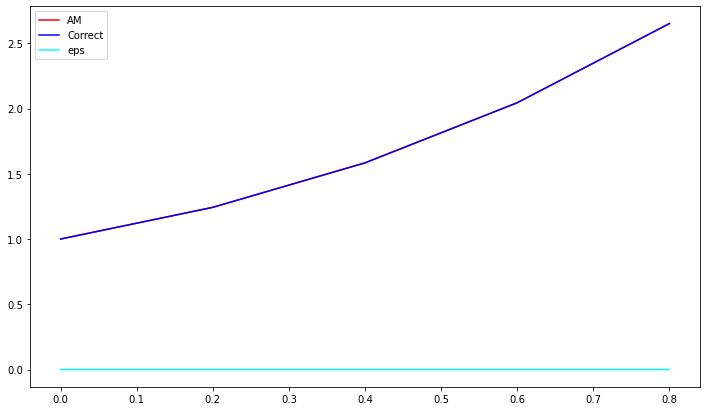

In [24]:
PTVPAM(x0,y0,X,S,h,eps)